# `ibip`
Image based invasion percolation algorithm to simulate volume controlled injection of non-wetting fluid into an image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
ps.visualization.set_mpl_style()

## `im`
Can be a 2D or 3D image:

[19:27:15] ERROR    Call to cuInit results in CUDA_ERROR_NO_DEVICE                                    ]8;id=929887;file://c:\Users\jeff\anaconda3\envs\dev\Lib\site-packages\numba\cuda\cudadrv\driver.py\driver.py]8;;\:]8;id=511256;file://c:\Users\jeff\anaconda3\envs\dev\Lib\site-packages\numba\cuda\cudadrv\driver.py#392\392]8;;\

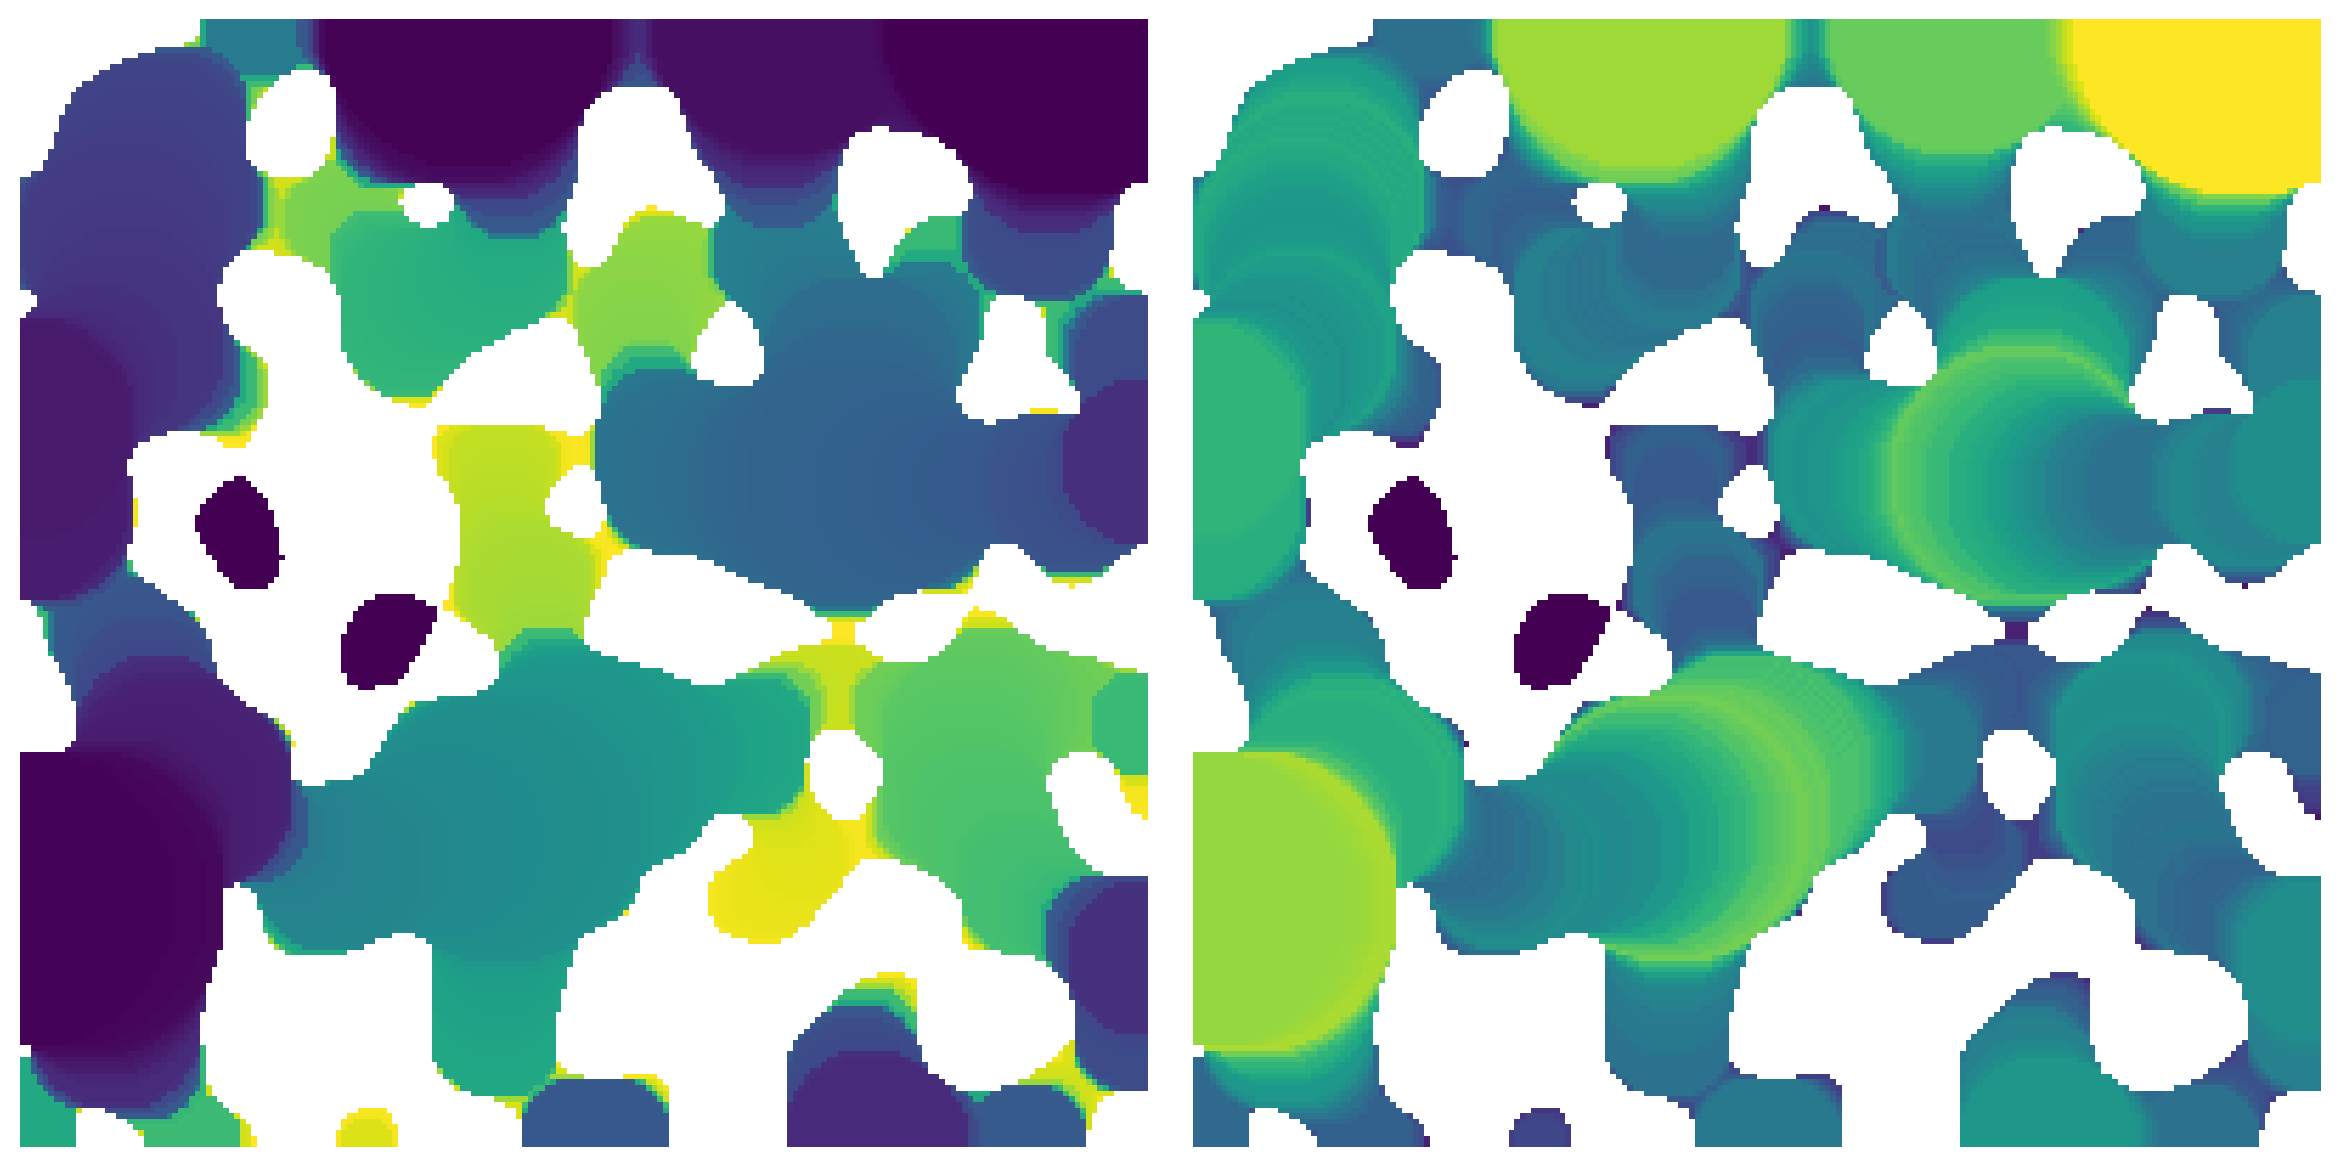

In [2]:
im = ps.generators.blobs(shape=[200, 200], porosity=0.7, blobiness=0.75)
ip = ps.simulations.ibip(im=im)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(ip.im_seq/im, origin='lower')
ax[0].axis(False)
ax[1].imshow(ip.im_size/im, origin='lower')
ax[1].axis(False);

The function results a ``Results`` object with an image containing the invasion sequence of each voxel (left) and the invasion size of each voxel (right).  These can be used to generate a capillary pressure curve.

## `inlets`
By default invasion begins from all sides, but the ``inlets`` can be specified.

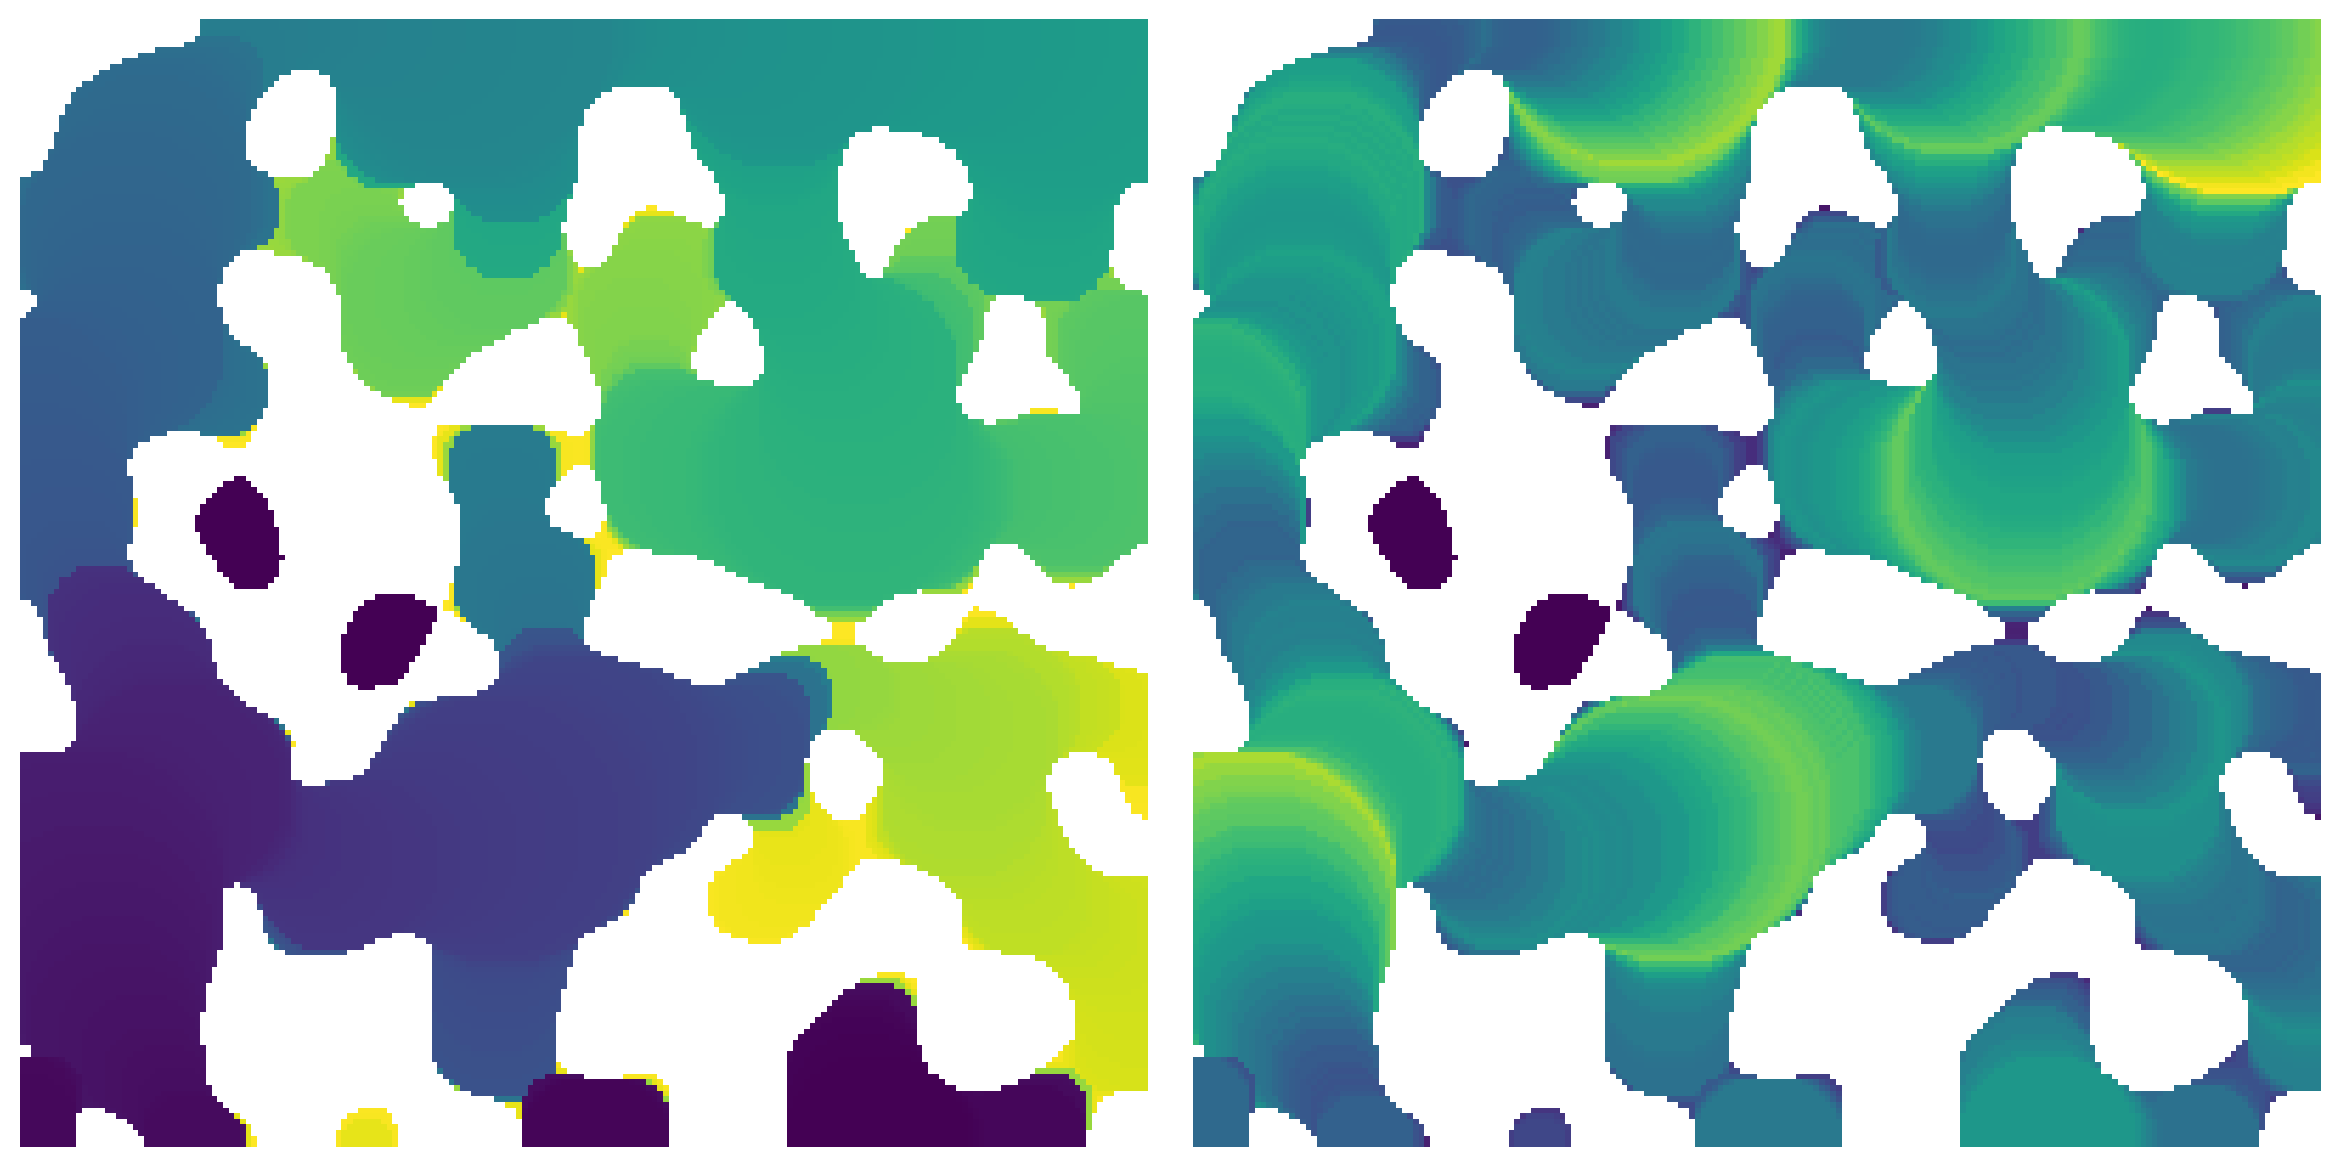

In [3]:
inlets = np.zeros_like(im)
inlets[0, ...] = True
ip = ps.simulations.ibip(im=im, inlets=inlets)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(ip.im_seq/im, origin='lower')
ax[0].axis(False)
ax[1].imshow(ip.im_size/im, origin='lower')
ax[1].axis(False);

## `maxiter`
The maximum number of iterations to run before stopping, mostly to prevent the algorithm from stalling (or appearing to stall) on huge images.

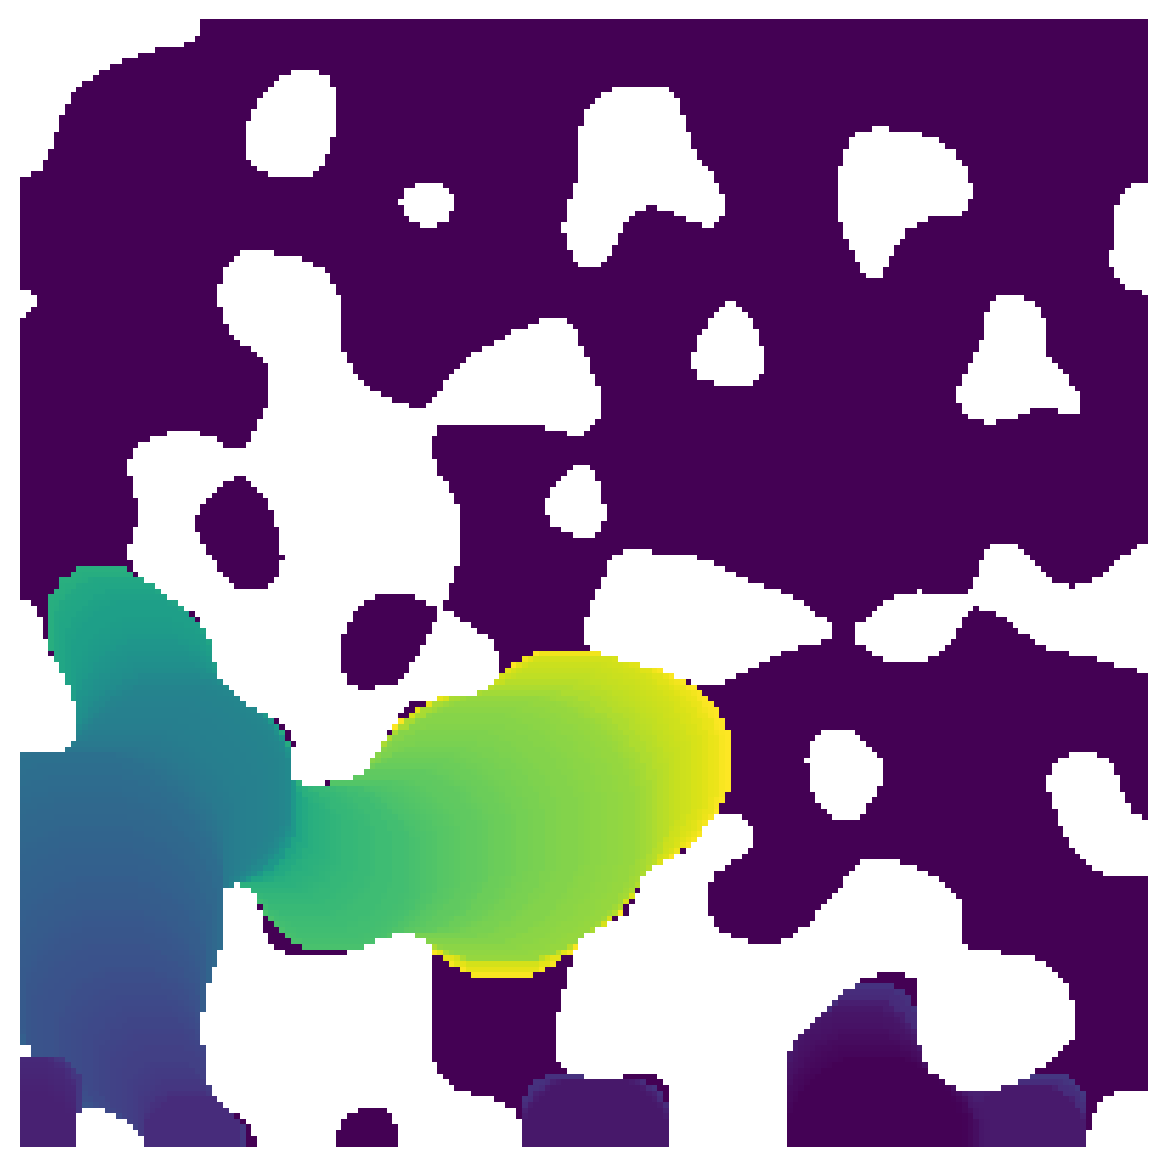

In [4]:
ip = ps.simulations.ibip(im=im, inlets=inlets, maxiter=500)

fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(ip.im_seq/im, origin='lower')
ax.axis(False);